# Exploring search results

After finishing a pipeline search, we can inspect the results. First, let's build a search of 10 different pipelines to explore.

In [1]:
import evalml

X, y = evalml.demos.load_breast_cancer()

clf = evalml.AutoClassifier(objective="f1",
                            max_pipelines=10)

clf.fit(X, y)

*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. Greater score is better.

Searching up to 10 pipelines. 
Possible model types: xgboost, random_forest, linear_model

✔ XGBoost Classifier w/ One Hot Encod...     0%|          | Elapsed:00:00
✔ XGBoost Classifier w/ One Hot Encod...    10%|█         | Elapsed:00:00
✔ Random Forest Classifier w/ One Hot...    20%|██        | Elapsed:00:06
✔ XGBoost Classifier w/ One Hot Encod...    30%|███       | Elapsed:00:06
✔ Logistic Regression Classifier w/ O...    40%|████      | Elapsed:00:15
✔ XGBoost Classifier w/ One Hot Encod...    50%|█████     | Elapsed:00:15
✔ Logistic Regression Classifier w/ O...    60%|██████    | Elapsed:00:23
✔ XGBoost Classifier w/ One Hot Encod...    70%|███████   | Elapsed:00:23
✔ Logistic Regression Classifier w/ O...    80%|████████  | Elapsed:00:31
✔ Logistic Regression Classifier w/ O...    90%|█████████ | Elapsed:00:40
✔ Logistic Regression Classifier 

## View Rankings
A summary of all the pipelines built can be returned as a dataframe. It is sorted by score. EvalML knows based on your objective function whether or not high or lower is better.

In [2]:
clf.rankings

,id,pipeline_name,score,high_variance_cv,parameters
0,8,LogisticRegressionPipeline,0.980527,False,"{'penalty': 'l2', 'C': 0.5765626434012575, 'im..."
1,6,LogisticRegressionPipeline,0.974853,False,"{'penalty': 'l2', 'C': 6.239401330891865, 'imp..."
2,9,LogisticRegressionPipeline,0.974853,False,"{'penalty': 'l2', 'C': 8.123565600467177, 'imp..."
3,4,LogisticRegressionPipeline,0.973411,False,"{'penalty': 'l2', 'C': 8.444214828324364, 'imp..."
4,1,XGBoostPipeline,0.970626,False,"{'eta': 0.38438170729269994, 'min_child_weight..."
5,2,RFClassificationPipeline,0.966846,False,"{'n_estimators': 569, 'max_depth': 22, 'impute..."
6,5,XGBoostPipeline,0.966592,False,"{'eta': 0.6481718720511973, 'min_child_weight'..."
7,0,XGBoostPipeline,0.965192,False,"{'eta': 0.5928446182250184, 'min_child_weight'..."
8,7,XGBoostPipeline,0.963913,False,"{'eta': 0.9786183422327642, 'min_child_weight'..."
9,3,XGBoostPipeline,0.952237,False,"{'eta': 0.5288949197529046, 'min_child_weight'..."


## Describe Pipeline
Each pipeline is given an `id`. We can get more information about any particular pipeline using that id

In [3]:
clf.describe_pipeline(0)

************************
* Pipeline Description *
************************

Pipeline Name: XGBoost Classifier w/ One Hot Encoder + Simple Imputer + RF Classifier Select From Model
Model type: ModelTypes.XGBOOST
Objective: F1 (greater is better)
Total training time (including CV): 0.2 seconds

Parameters
• eta: 0.5928446182250184
• min_child_weight: 8.598391737229157
• max_depth: 4
• impute_strategy: most_frequent
• percent_features: 0.6273280598181127

Cross Validation
               F1  Precision  Recall   AUC  Log Loss   MCC # Training # Testing
0           0.950      0.935   0.950 0.985     0.154 0.864    379.000   190.000
1           0.975      0.959   0.975 0.996     0.102 0.933    379.000   190.000
2           0.970      0.991   0.970 0.983     0.137 0.923    380.000   189.000
mean        0.965      0.962   0.965 0.988     0.131 0.907          -         -
std         0.013      0.028   0.013 0.007     0.026 0.037          -         -
coef of var 0.014      0.029   0.014 0.007    

## Get Pipeline
You can get the object for any pipeline as well

In [4]:
clf.get_pipeline(0)

### Get best pipeline
If you specifically want to get the best pipeline, there is a convenient access. 

In [5]:
clf.best_pipeline

## Feature Importances

We can get the feature importances of the resulting pipeline

In [6]:
pipeline = clf.get_pipeline(0)
pipeline.feature_importances

,feature,importance
0,22,0.407441
1,7,0.239457
2,27,0.120609
3,20,0.072031
4,23,0.052818
5,6,0.038344
6,1,0.033962
7,21,0.028949
8,4,0.003987
9,25,0.002403


## Access raw results
You can also get access to all the underlying data like this

In [7]:
clf.results

{0: {'id': 0,
  'pipeline_name': 'XGBoostPipeline',
  'parameters': {'eta': 0.5928446182250184,
   'min_child_weight': 8.598391737229157,
   'max_depth': 4,
   'impute_strategy': 'most_frequent',
   'percent_features': 0.6273280598181127},
  'score': 0.9651923054186028,
  'high_variance_cv': False,
  'training_time': 0.2024831771850586,
  'cv_data': [{'all_objective_scores': OrderedDict([('F1', 0.9504132231404958),
                 ('Precision', 0.9349593495934959),
                 ('Recall', 0.9504132231404958),
                 ('AUC', 0.984731920937389),
                 ('Log Loss', 0.1536501646237938),
                 ('MCC', 0.8644170412909863),
                 ('ROC',
                  (array([0.        , 0.        , 0.        , 0.        , 0.        ,
                          0.        , 0.        , 0.        , 0.        , 0.        ,
                          0.01408451, 0.01408451, 0.01408451, 0.01408451, 0.01408451,
                          0.01408451, 0.01408451, 0.014

## Plot ROC
For binary classification tasks, you can also plot the ROC plot of a specific pipeline:

<IPython.core.display.Javascript object>


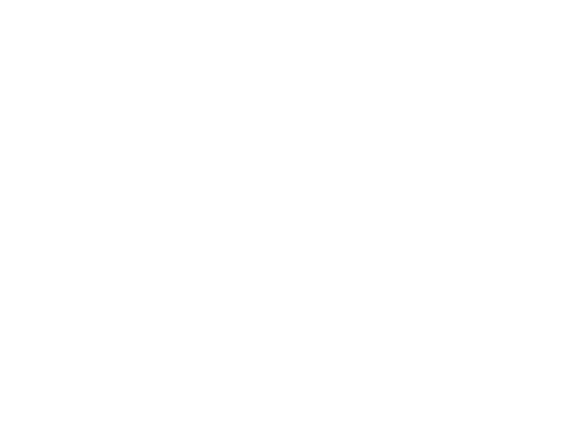

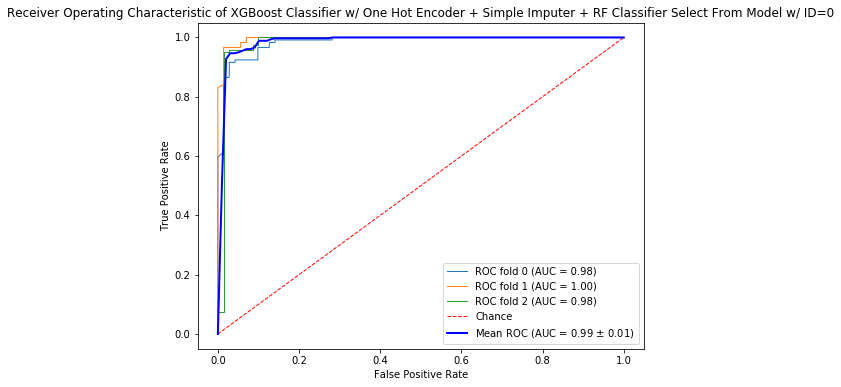

In [8]:
clf.generate_roc_plot(0)